<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Gym Membership: EDA and Statistical Testing
</div>


<div style="background-color: #d1e7dd; padding: 10px; border-left: 5px solid #0f5132;">
<strong>Note:</strong> Good reading is required to understand every details of this analysis thank you!
</div>


# CONTEXT
### This dataset provides a simulated representation of membership data for a gym ,it is structured to facilitate the discovery of key membership patterns and trends



### Data source:
https://www.kaggle.com/datasets/ka66ledata/gym-membership-dataset

<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Import important libaries
</div>


In [6]:
# import important libaries
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import skew
from scipy.stats import ttest_ind
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [7]:
# inspect data, print top 5 
df = pd.read_csv("gym_membership.csv")
df

,id,gender,birthday,Age,abonoment_type,visit_per_week,days_per_week,attend_group_lesson,fav_group_lesson,avg_time_check_in,avg_time_check_out,avg_time_in_gym,drink_abo,fav_drink,personal_training,name_personal_trainer,uses_sauna
0,1,Female,1997-04-18,27,Premium,4,"Mon, Sat, Tue, Wed",True,"Kickboxen, BodyPump, Zumba",19:31:00,21:27:00,116,False,NaN,False,NaN,True
1,2,Female,1977-09-18,47,Standard,3,"Mon, Sat, Wed",False,NaN,19:31:00,20:19:00,48,False,NaN,True,Chantal,False
2,3,Male,1983-03-30,41,Premium,1,Sat,True,XCore,08:29:00,10:32:00,123,True,"berry_boost, lemon",True,Mike,False
3,4,Male,1980-04-12,44,Premium,3,"Sat, Tue, Wed",False,NaN,09:54:00,11:33:00,99,True,passion_fruit,True,Mike,True
4,5,Male,1980-09-10,44,Standard,2,"Thu, Wed",True,"Running, Yoga, Zumba",08:29:00,09:19:00,50,False,NaN,True,Mike,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Female,1984-09-22,40,Standard,3,"Thu, Tue, Wed",False,NaN,20:56:00,22:42:00,106,False,NaN,False,NaN,False
996,997,Female,2008-11-19,15,Standard,3,"Fri, Mon, Sun",True,"XCore, Zumba",09:14:00,11:28:00,134,True,"orange, lemon",False,NaN,True
997,998,Male,1984-10-05,40,Standard,2,"Fri, Tue",False,NaN,17:21:00,19:53:00,152,True,"coconut_pineapple, black_currant",True,Jeffrey,True
998,999,Male,2001-02-22,23,Standard,4,"Mon, Sun, Thu, Tue",True,"HIT, XCore",10:23:00,12:29:00,126,True,berry_boost,True,Jeffrey,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   int64 
 1   gender                 1000 non-null   object
 2   birthday               1000 non-null   object
 3   Age                    1000 non-null   int64 
 4   abonoment_type         1000 non-null   object
 5   visit_per_week         1000 non-null   int64 
 6   days_per_week          1000 non-null   object
 7   attend_group_lesson    1000 non-null   bool  
 8   fav_group_lesson       503 non-null    object
 9   avg_time_check_in      1000 non-null   object
 10  avg_time_check_out     1000 non-null   object
 11  avg_time_in_gym        1000 non-null   int64 
 12  drink_abo              1000 non-null   bool  
 13  fav_drink              496 non-null    object
 14  personal_training      1000 non-null   bool  
 15  name_personal_trainer 

In [9]:
#get shape of data set
print("rows:", df.shape[0])
print("columns:" ,df.shape[1]) 
print("\nduplicates\n ",df.duplicated().sum() )
print("\nmissing values:\n" ,df.isna().sum().values.sum())
print("\ncolumns\n  ",df.columns.tolist())
print("\nunique values\n ",df.nunique() )



rows: 1000
columns: 17

duplicates
  0

missing values:
 1483

columns
   ['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week', 'days_per_week', 'attend_group_lesson', 'fav_group_lesson', 'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym', 'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer', 'uses_sauna']

unique values
  id                       1000
gender                      2
birthday                  974
Age                        38
abonoment_type              2
visit_per_week              5
days_per_week             115
attend_group_lesson         2
fav_group_lesson          253
avg_time_check_in         556
avg_time_check_out        572
avg_time_in_gym           151
drink_abo                   2
fav_drink                  36
personal_training           2
name_personal_trainer       4
uses_sauna                  2
dtype: int64


- There 1000 rows and some columns include NAN values which are useful for this analysis

In [10]:
#changing object dtype to category for categorical features
list_categorical= []

for col in df.columns:
    if df[col].nunique()<= 2:
        list_categorical.append(col)

In [11]:
for col in list_categorical:
    df[col]=df[col].astype("category")

In [12]:
# This are the categorical features
df.select_dtypes(include = 'category' ).columns

Index(['gender', 'abonoment_type', 'attend_group_lesson', 'drink_abo',
       'personal_training', 'uses_sauna'],
      dtype='object')

In [13]:
# This are the numerical features
df.select_dtypes(include=np.number).columns

Index(['id', 'Age', 'visit_per_week', 'avg_time_in_gym'], dtype='object')

In [14]:
df.describe()

,id,Age,visit_per_week,avg_time_in_gym
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,30.604000,2.682000,105.260000
std,288.819436,10.817958,1.241941,43.557177
min,1.000000,12.000000,1.000000,30.000000
25%,250.750000,21.000000,2.000000,67.000000
50%,500.500000,30.000000,3.000000,104.000000
75%,750.250000,40.000000,3.000000,143.000000
max,1000.000000,49.000000,5.000000,180.000000


#### Observations
- Average Age of gym member is 30.6 , minimum is 12 and maximum is 49
- Average number of visit to the gym per week 2.68 and maximum 5
- Mean is slightly less than median for average visit indicating 
- Average time spent at the gym is 105.26 minutes,minimum is 30min and maximum is 180 minutes

In [15]:
df['visit_per_week'].skew()

0.40011152973001407

### skewness shows the average visit per week is slightly positively skewed

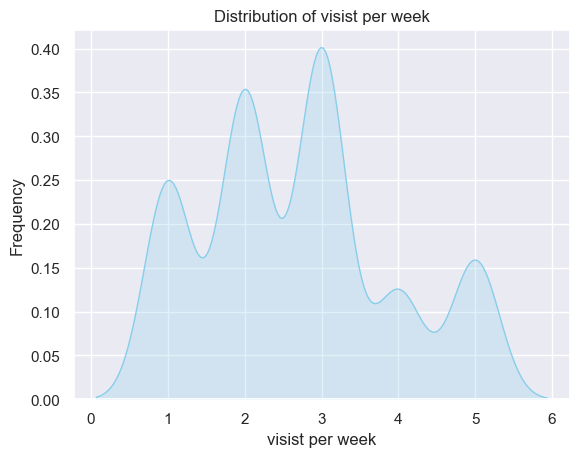

In [16]:
sns.kdeplot(df['visit_per_week'],shade=True, color='skyblue')
plt.title("Distribution of visist per week")
plt.xlabel("visist per week")
plt.ylabel("Frequency")
plt.show()

#### observations
- The distribution is not perfectly symmetric is multimodal distibution
- Most people visit the gym 2 to 3 times per week
- There's a smaller group that visits 4 to 5 times
- Very few visit 0–1 time per week

In [17]:
df.describe(include="category")

,gender,abonoment_type,attend_group_lesson,drink_abo,personal_training,uses_sauna
count,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2
top,Female,Standard,True,False,True,False
freq,503,507,503,504,518,507


In [18]:
# get counts of unique observations for each category variable
list_col = df.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(df[list_col[i]].value_counts())
    print()

gender
Female    503
Male      497
Name: count, dtype: int64

abonoment_type
Standard    507
Premium     493
Name: count, dtype: int64

attend_group_lesson
True     503
False    497
Name: count, dtype: int64

drink_abo
False    504
True     496
Name: count, dtype: int64

personal_training
True     518
False    482
Name: count, dtype: int64

uses_sauna
False    507
True     493
Name: count, dtype: int64



#### Obervations
- Females are 503 and males are 497 which indicated that there are slightly more female members than male.
- standard is most common subcription,507 member subcribed for standard while 493 subscribe for premium.
- member visit mostly 3 days per week compare to other days per week.
- more members attend group lesson and more members subscribe for drink
- more members have personal trainers ,518 members has a personal trainer while 482 have no personal trainer 
- Memebers that didnt use sauna (507 members) are more than memebers that used sauna(493 members)


<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Exploratory Data Analysis
</div>


### Univariate Analysis(Numerical variables)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_box(data, col_name):
    """
    Plots a boxplot and histogram for a numeric variable.
    Shows spread, central tendency, dispersion, and outliers.
    """
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    fig, (ax_box, ax_hist) = plt.subplots(
        2, 1,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=(8, 5)
    )

    fig.suptitle(f"Spread of Data for {col_name.upper()}", fontsize=16, fontweight='bold')

    sns.boxplot(x=data, showmeans=True, orient='h', color="violet", ax=ax_box)
    ax_box.set(xlabel='')

    sns.histplot(data, kde=False, color='blue', ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--', linewidth=2)
    ax_hist.axvline(median, color='g', linestyle='-', linewidth=2)
    ax_hist.axvline(mode, color='y', linestyle='-', linewidth=2)

    plt.legend({'Mean': mean, 'Median': median, 'Mode': mode})
    plt.tight_layout()
    plt.show()


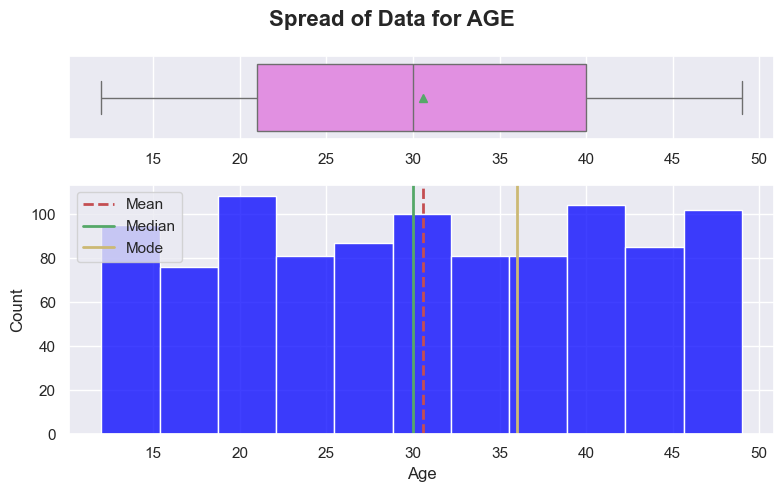

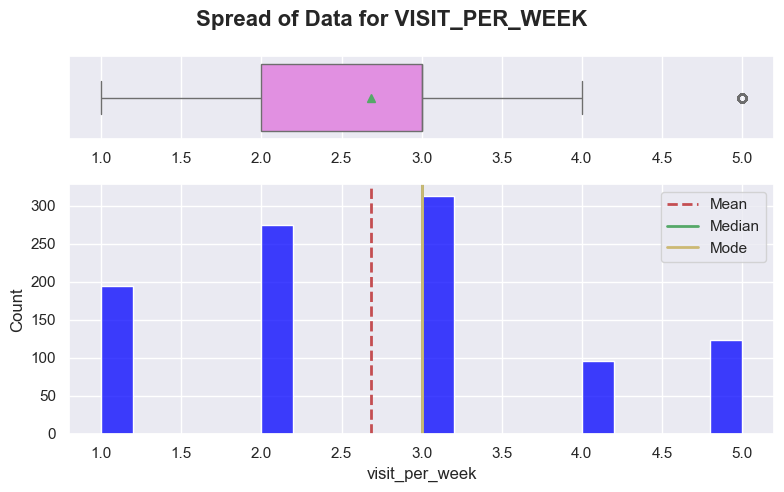

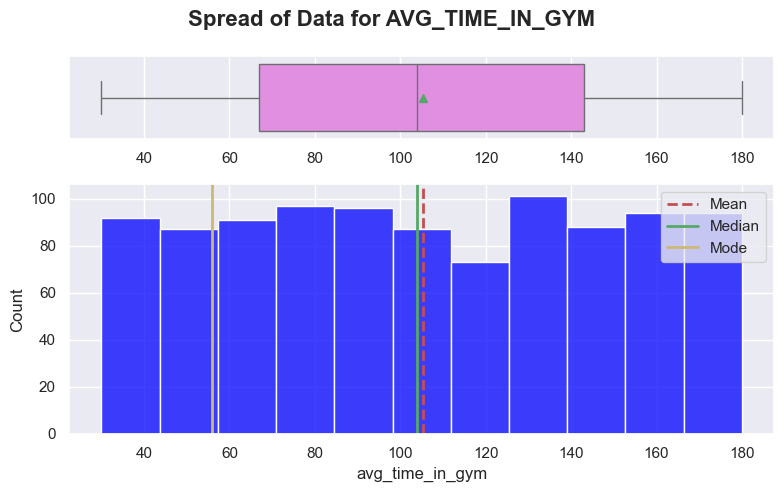

In [20]:
list_col = df.select_dtypes([np.number]).columns
for col in list_col[1:]:
    dist_box(df[col], col)

### Observations 
- Age has a uniform distribution ,Average age of members is 30yrs and high number of members within age 36yrs compare to other age 
- The mode, median, and 75th percentile of visits per week are all 3 days,this shows most members visit around 3 days each week.
- The most common average time spent is 105 minutes,majority of members spend between 56 and 67 minutes,Only a few members spend more than the average time

### Univariate Analysis(Categorical variables)

In [21]:
df['avg_time_in_gym'].value_counts()

avg_time_in_gym
67     14
56     14
93     13
138    12
105    12
       ..
113     3
121     3
111     2
152     2
46      1
Name: count, Length: 151, dtype: int64

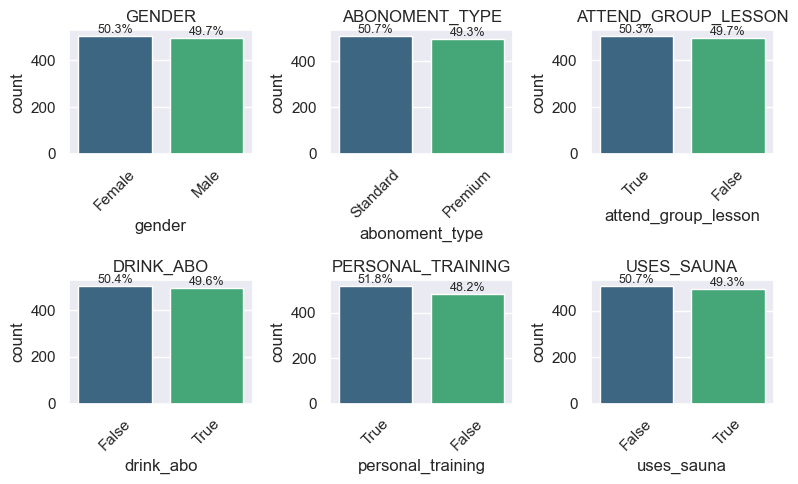

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_perc(plot, features):
    total = len(features)
    for p in plot.patches:
        count = p.get_height()
        perc = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = count
        plot.text(x, y, perc, ha='center', va='bottom', fontsize=9)

list_col = df.select_dtypes(['category']).columns

fig1, axes1 = plt.subplots(2, 3, figsize=(8, 5))
axes1 = axes1.flatten()

for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index
    sns.countplot(x=list_col[i], data=df, order=order, ax=axes1[i], palette='viridis')
    axes1[i].set_title(list_col[i].upper())
    axes1[i].tick_params(axis='x', rotation=45)
    bar_perc(axes1[i], df[list_col[i]])



plt.tight_layout()
plt.show()


## Observation
- The data is well balanced across categories with slight difference
- Gender (50.3% Females and 49.7% Male) and attend group lesson(50.3% True and 49.7% False)  has equal proportion in their categories
- Abnoment type has(50.7 are Standard while 49.3 are Premuim) and Sauna uses (with 50.7% False and 49.3% True) also have same proportion
- Investigate if features with equal proportions have relationships or interactions that affect outcomes.


In [23]:
# Gender vs Group Lesson
pd.crosstab(df['gender'], df['attend_group_lesson'], normalize='index') * 100


attend_group_lesson,False,True
gender,,
Female,50.695825,49.304175
Male,48.692153,51.307847


In [24]:
# Abonement vs Sauna
# Abonement vs Sauna
pd.crosstab(df['abonoment_type'], df['uses_sauna'])



uses_sauna,False,True
abonoment_type,,
Premium,236,257
Standard,271,236


## Bivariate & Multivariate Analysis

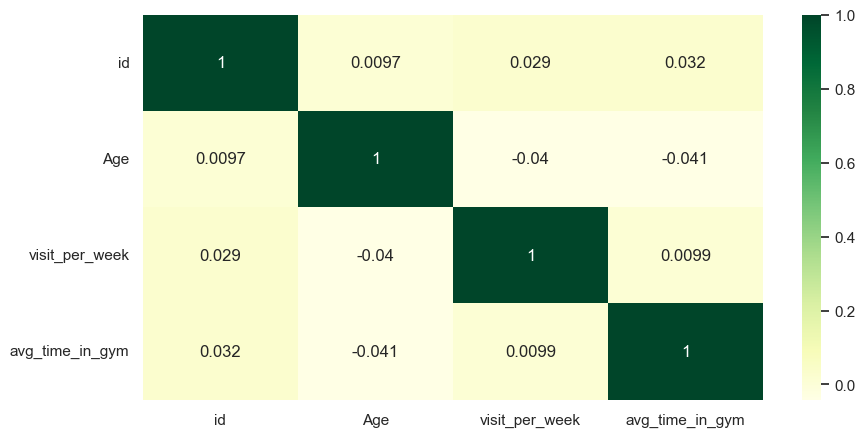

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True ,cmap="YlGn" )
plt.show()

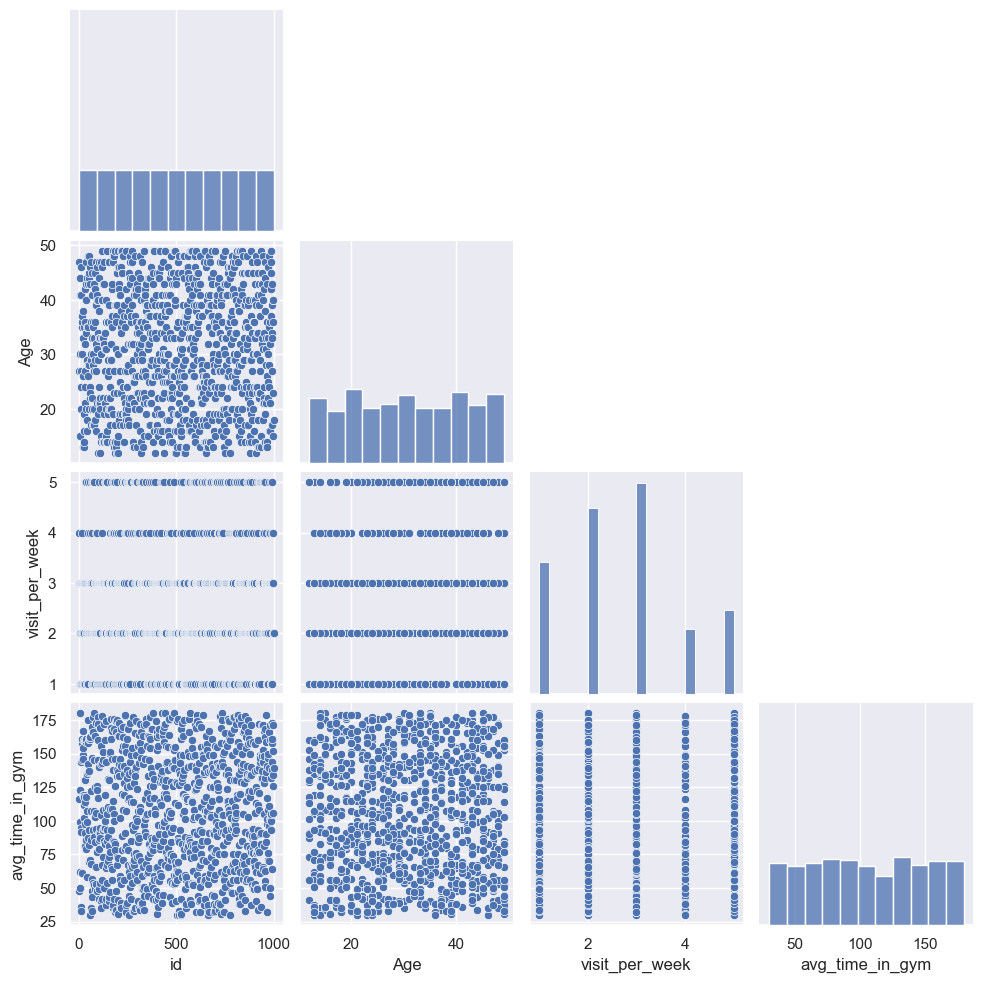

In [26]:
sns.pairplot(data=df , corner=True)
plt.show()

### Observation
- There is no correlation between numeric variables

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     1000 non-null   int64   
 1   gender                 1000 non-null   category
 2   birthday               1000 non-null   object  
 3   Age                    1000 non-null   int64   
 4   abonoment_type         1000 non-null   category
 5   visit_per_week         1000 non-null   int64   
 6   days_per_week          1000 non-null   object  
 7   attend_group_lesson    1000 non-null   category
 8   fav_group_lesson       503 non-null    object  
 9   avg_time_check_in      1000 non-null   object  
 10  avg_time_check_out     1000 non-null   object  
 11  avg_time_in_gym        1000 non-null   int64   
 12  drink_abo              1000 non-null   category
 13  fav_drink              496 non-null    object  
 14  personal_training      1000 non-null   ca

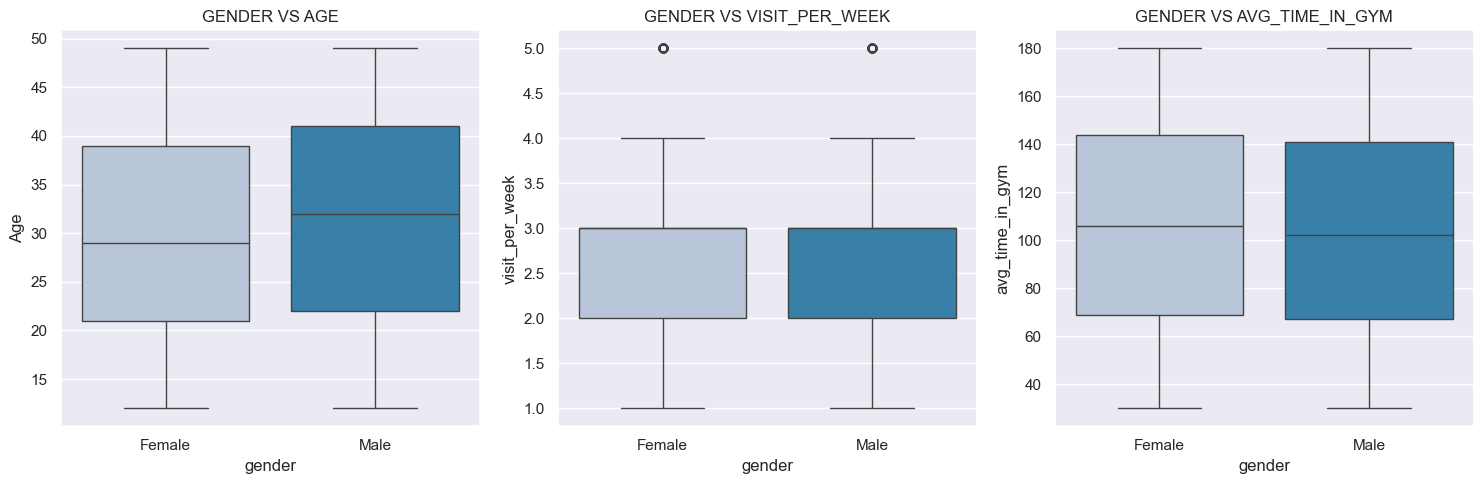

In [28]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['gender'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('GENDER VS ' + list_col[i].upper())

plt.tight_layout()
plt.show()


### Observation
- Average age of male members is higher than female memebers,Males have an older age range compared to females, meaning the oldest males are older than the oldest females.
- Male and female members has same mean and mode which is 3days visit per week, with few outlier of 5days a week in both gender 
- Average time spent by female is higher than average time spent by male at gym

In [29]:
 df.select_dtypes(['category']).columns

Index(['gender', 'abonoment_type', 'attend_group_lesson', 'drink_abo',
       'personal_training', 'uses_sauna'],
      dtype='object')

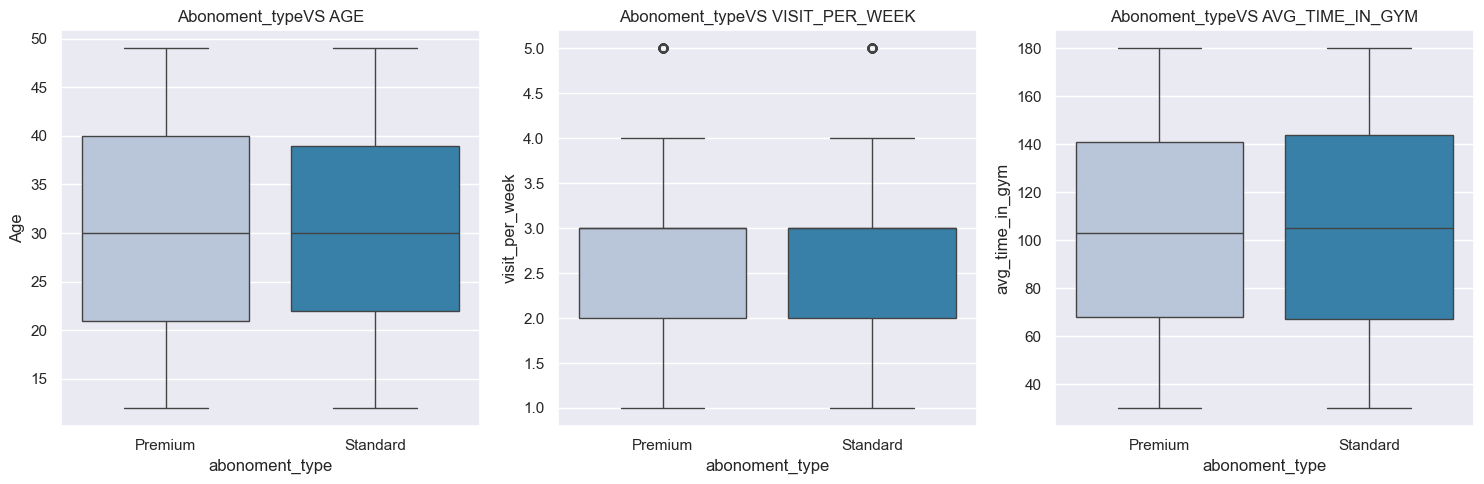

In [30]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['abonoment_type'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('Abonoment_typeVS ' + list_col[i].upper())

plt.tight_layout()
plt.show()

### Observation
- members with Premuim  abnoment type has wide age range than members that standard abnoment type
- Abnoment type doesn't affect number of days vist per week
- Average mean of members with standard abnoment type is slightly higher than memebers with premuim  abnoment type

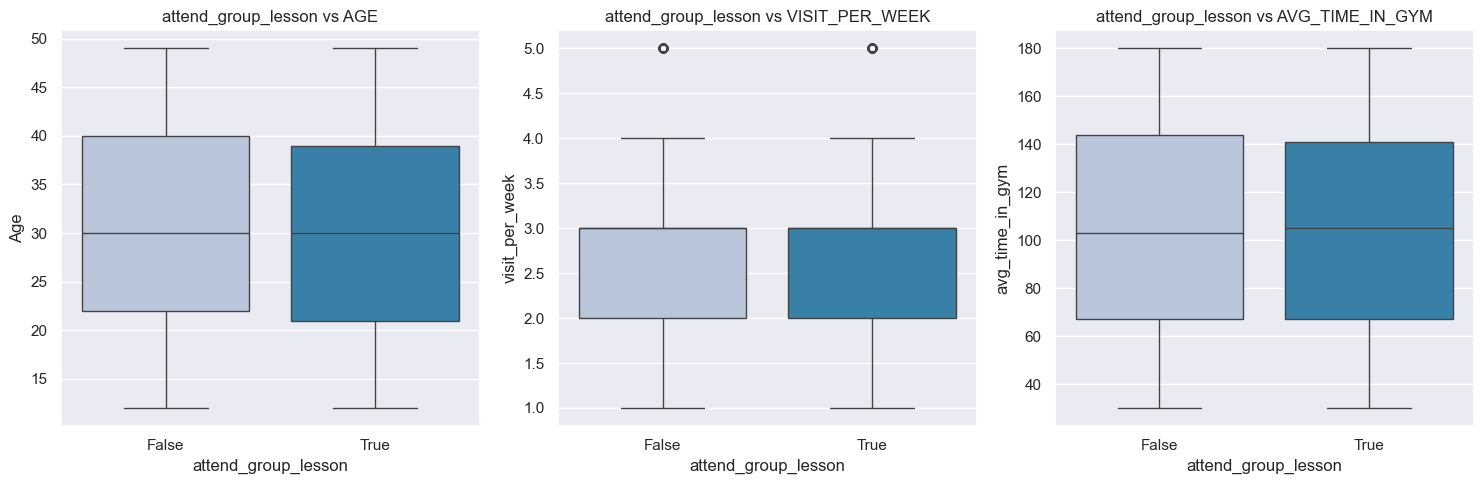

In [68]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['attend_group_lesson'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('attend_group_lesson vs ' + list_col[i].upper())

plt.tight_layout()
plt.show()

### observation
- Members that didn't  attend group lesson has sighty wide  range of age than those that attend group lesson
- Members that attend group lesson has slighty higher average time at the gym than those that didnt
- Members that didn't  attend group lesson has sighty wide  range of average time spent in the gymthan those that attend group lesson

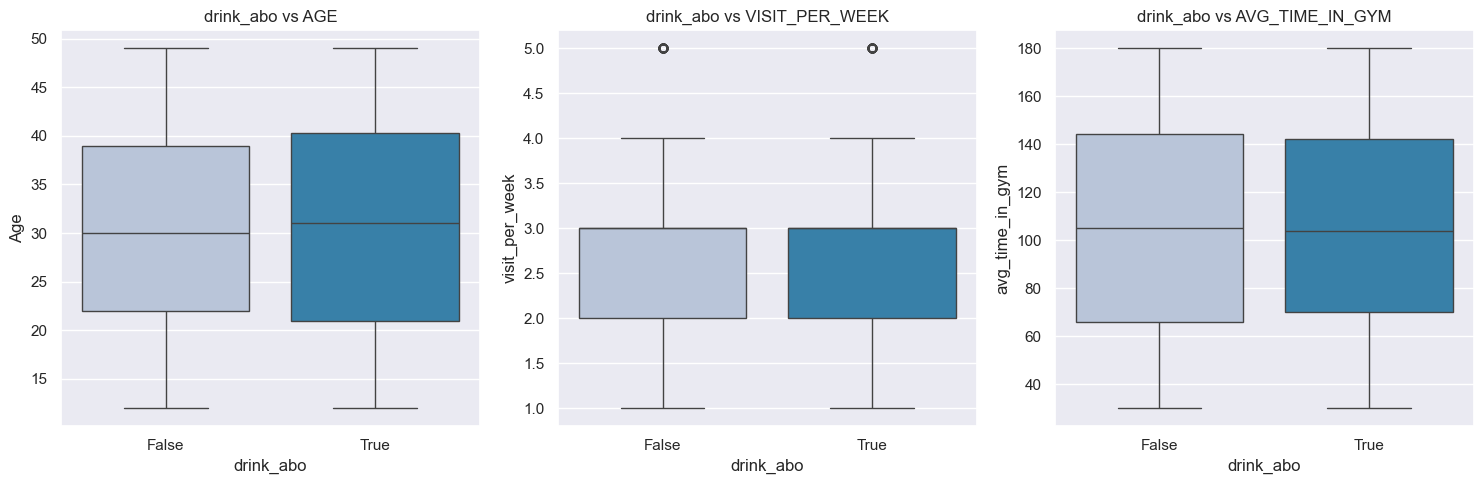

In [70]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['drink_abo'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('drink_abo vs ' + list_col[i].upper())

plt.tight_layout()
plt.show()

### Observation:
- Average of Members that subscribe drink is higher than those didnt
- Memebers that didnt sunscibe for drink spend slightly more time those that subscribe for drink

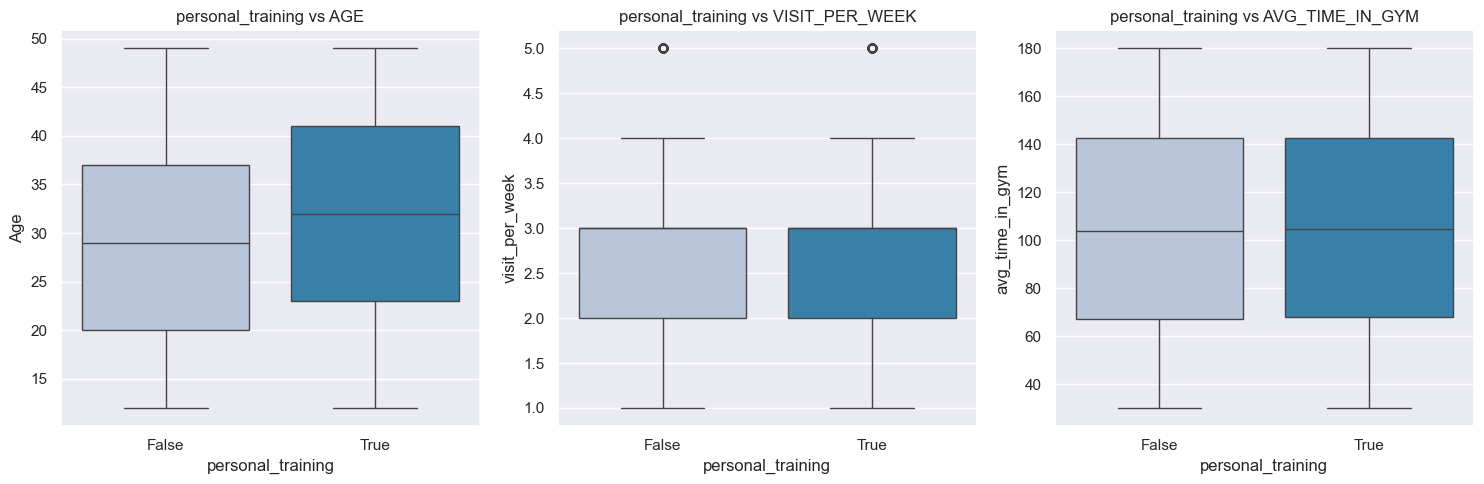

In [71]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['personal_training'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('personal_training vs ' + list_col[i].upper())

plt.tight_layout()
plt.show()

### Observation
- Members that have personal trainer have an older age range meaning , majority of older members has personal trainers
- There is aproximatley equal time spent at the gym by members with trainers and members withou trainers



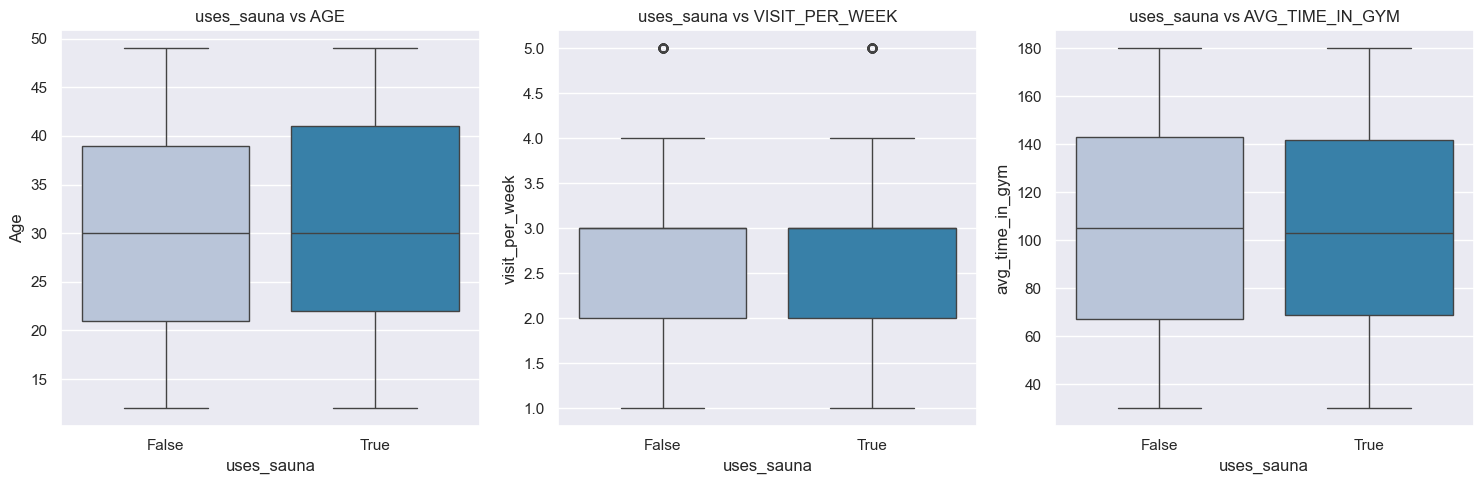

In [72]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['uses_sauna'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('uses_sauna vs ' + list_col[i].upper())

plt.tight_layout()
plt.show()

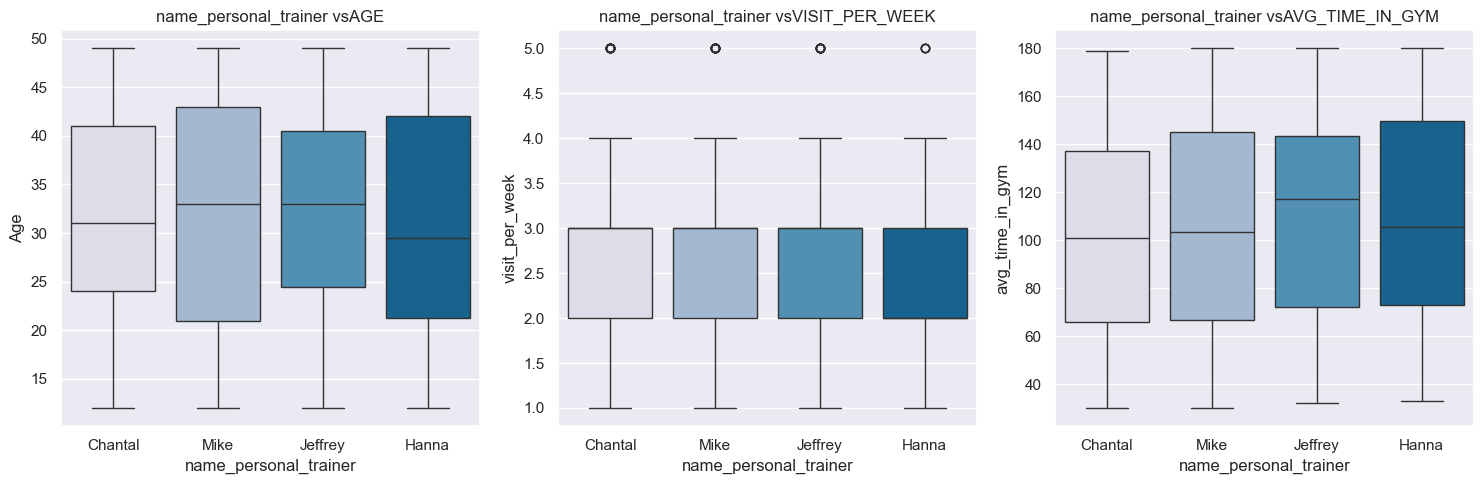

In [73]:
list_col = df.select_dtypes(include=[np.number]).columns[1:]  # Select 3 columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(list_col)):
    sns.boxplot(y=df[list_col[i]], x=df['name_personal_trainer'], ax=axes[i], palette="PuBu", orient='v')
    axes[i].set_title('name_personal_trainer vs' + list_col[i].upper())

plt.tight_layout()
plt.show()

### Observations
- Mike works with a wider age group compared to other trainers.

- Hanna's clients show the widest range in time spent at the gym ,some stay much longer, some shorter.

- Jeffrey's clients, on average, spend more time in the gym than others including Hanna’s clients.



In [36]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

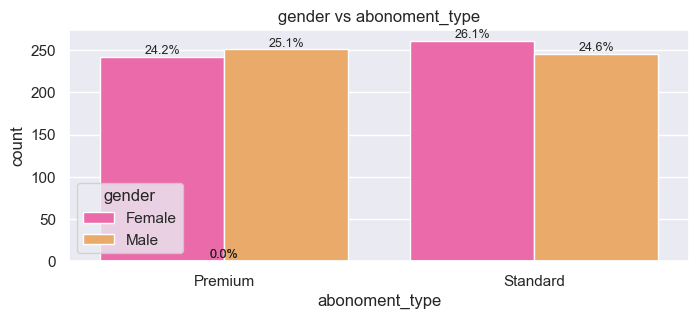

In [37]:
plt.figure(figsize=(8,3))
ax=sns.countplot(x='abonoment_type',hue='gender',data=df,palette='spring')
bar_perc(ax,df['gender'])
ax.set(title="gender vs abonoment_type")
plt.show()

### observation
- There are more males that subcribed for premuim with slight difference than females
- There are more females that subcribed for standard

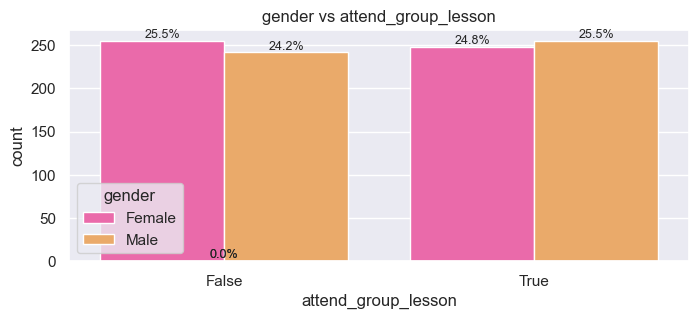

In [38]:
plt.figure(figsize=(8,3))
ax=sns.countplot(x='attend_group_lesson',hue='gender',data=df,palette='spring')
bar_perc(ax,df['gender'])
ax.set(title="gender vs attend_group_lesson")
plt.show()

### Observation
- more males attend group lesson than females

In [39]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

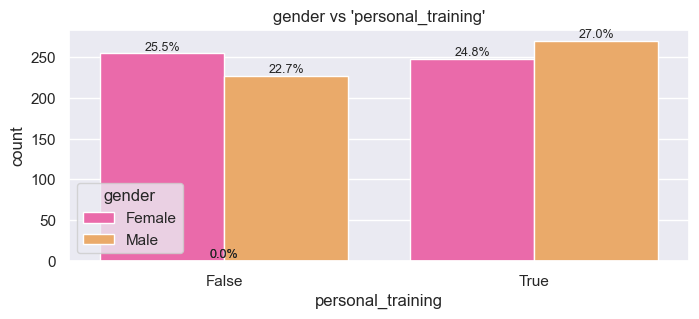

In [40]:
plt.figure(figsize=(8,3))
ax=sns.countplot(x='personal_training',hue='gender',data=df,palette='spring')
bar_perc(ax,df['gender'])
ax.set(title="gender vs 'personal_training'")
plt.show()

### Observations
- There are more males that has personal trainers than females

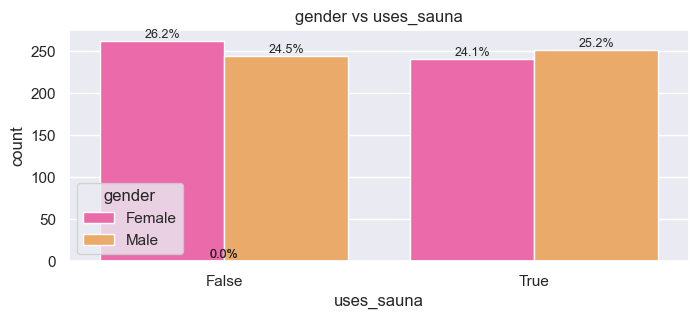

In [74]:
plt.figure(figsize=(8,3))
ax=sns.countplot(x='uses_sauna',hue='gender',data=df,palette='spring')
bar_perc(ax,df['gender'])
ax.set(title="gender vs uses_sauna")
plt.show()

## Observation
- More males uses sauna than Females

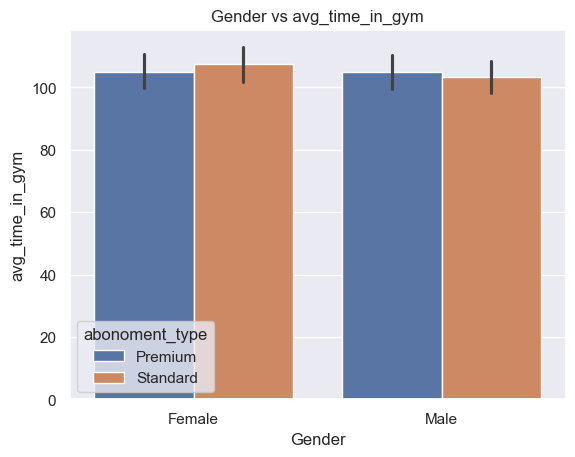

In [42]:
sns.barplot(data = df,x='gender', y='avg_time_in_gym',hue='abonoment_type')
plt.title('Gender vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('Gender')
plt.legend(title='abonoment_type')
plt.show()


### Observations
- Females approximately spent more time at the gym than male
- abonoment_type is uniform between females amd male, no significal difference

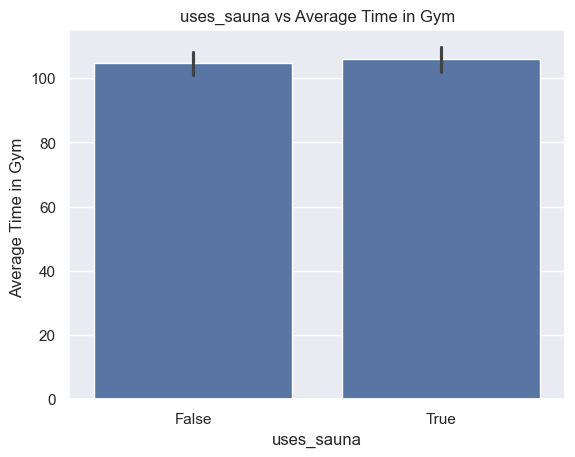

In [43]:
sns.barplot(data = df, x='uses_sauna', y='avg_time_in_gym' )
plt.title('uses_sauna vs Average Time in Gym')
plt.ylabel('Average Time in Gym ')
plt.xlabel('uses_sauna')
plt.show()


- members that used sauuna spent more time at the gym than those tha didnt those 

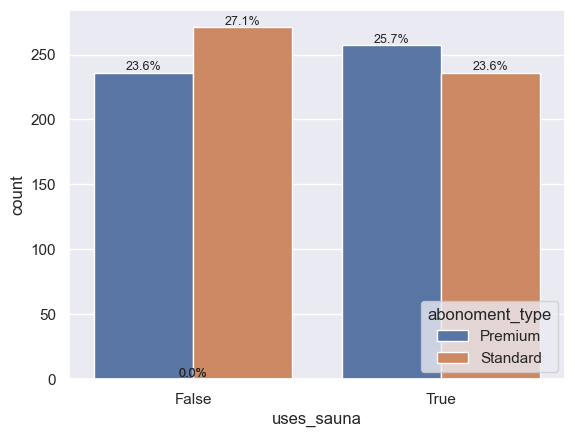

In [44]:
ax = sns.countplot(x=df['uses_sauna'],hue=df['abonoment_type'])
plt.xlabel('uses_sauna')
bar_perc(ax,df['uses_sauna'])
plt.legend(title='abonoment_type')
plt.show()

### Observations 
- memebers that didnt use sauna is more(50.7%) than members that use sauna(49.3%)
- Majority of members that used sauna subcribe for premuim abonoment type
-  Majority of members that  didn't used sauna subcribe for standard abonoment type

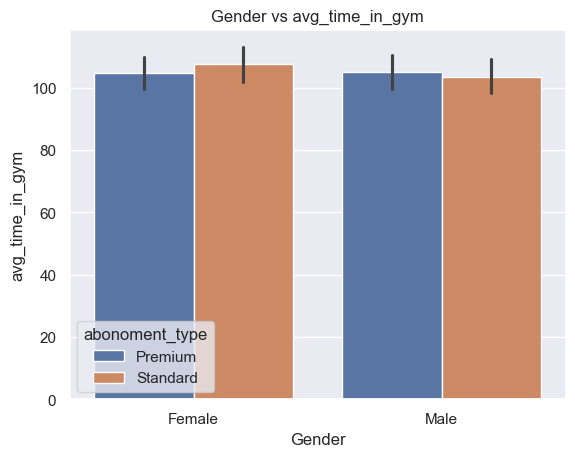

In [45]:
sns.barplot(data = df,x='gender', y='avg_time_in_gym',hue='abonoment_type')
plt.title('Gender vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('Gender')
plt.legend(title='abonoment_type')
plt.show()

In [46]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

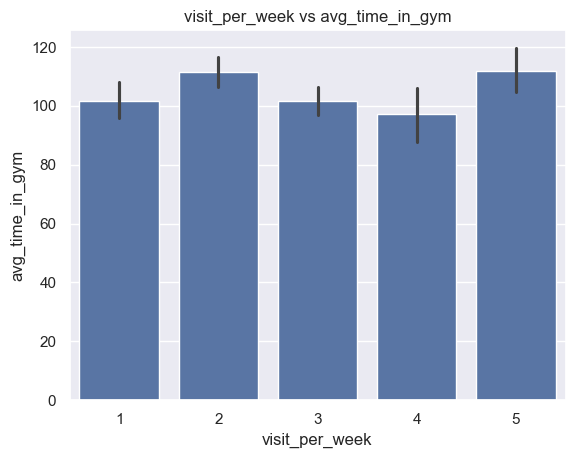

In [47]:
sns.barplot(x=df['visit_per_week'],y=df['avg_time_in_gym'])
plt.title('visit_per_week vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('visit_per_week')

plt.show()

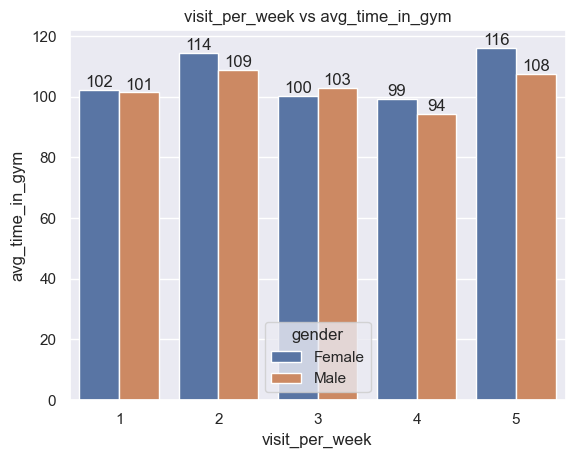

In [48]:
import numpy as np

ax = sns.barplot(x='visit_per_week', y='avg_time_in_gym', hue='gender', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.title('visit_per_week vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('visit_per_week')
plt.show()


### Observations
- members that come 2 and 5 days a week spend more time at the gym compare to other days
- Female generally spend more time at the gym than males except for males that works out 3 days a week 

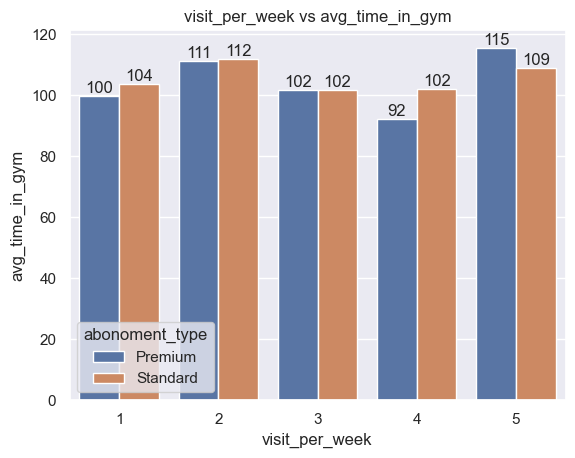

In [49]:
ax = sns.barplot(x='visit_per_week', y='avg_time_in_gym', hue='abonoment_type', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.title('visit_per_week vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('visit_per_week')
plt.show()

# Observations
- There is no significant difference in average time spent at the gym by visit per week in term of abonomemt type except for members that visit 4 days  a week where memebers that subcribe for standard are more than premium

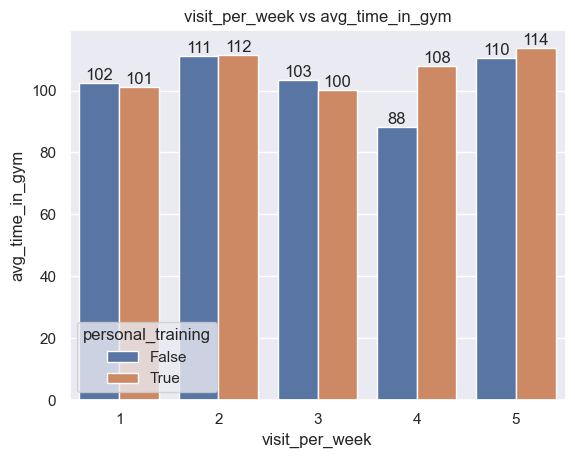

In [50]:
ax = sns.barplot(x='visit_per_week', y='avg_time_in_gym', hue='personal_training', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.title('visit_per_week vs avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('visit_per_week')
plt.show()

### Observations
- There is fluantuation in time spent at the gym for different visit per week in term of personal trainer or not
- members with personal trainers often spend more times that members without personal; trainer

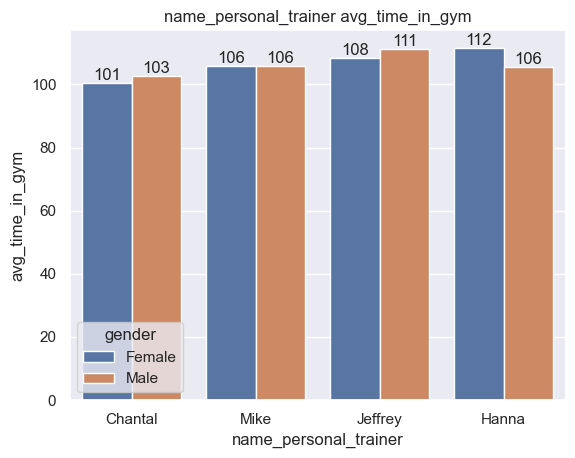

In [51]:
import numpy as np

ax = sns.barplot(x='name_personal_trainer', y='avg_time_in_gym',hue='gender', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.title('name_personal_trainer avg_time_in_gym')
plt.ylabel('avg_time_in_gym')
plt.xlabel('name_personal_trainer')
plt.show()


### Observations
- mike trian equal member of female and male , hanna train more female than male , and other trainer train more male than 


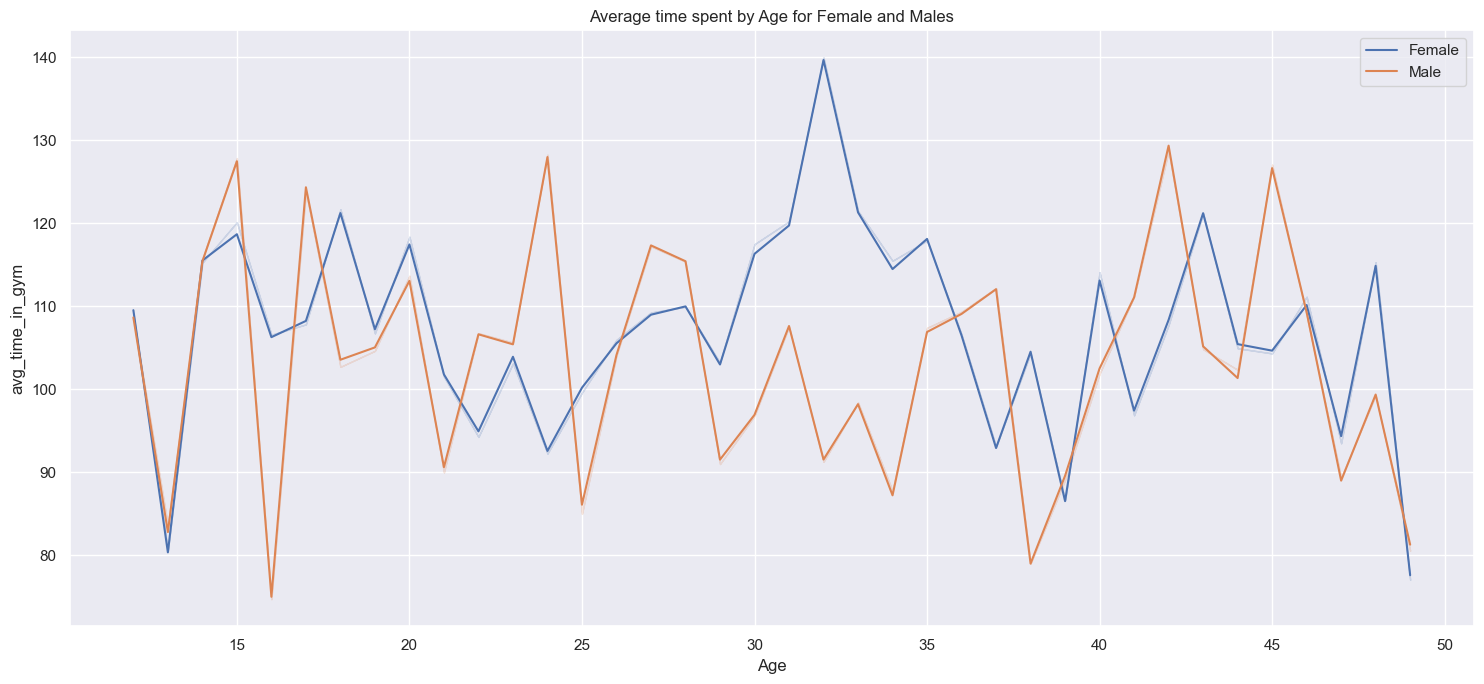

In [52]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Age",y = "avg_time_in_gym",hue="gender",data = df ,ci=0)
plt.title('Average time spent by Age for Female and Males')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.tight_layout()
plt.show()

### observation
- Time spent at the gym varies widely with age
- Around ages 13–15 and 23 males tend to spend more time
- Females consistently spend more time in the gym especially around age 32 where female gym time peaks over 140 minutes the highest point on the chart while male gym time remains relatively lower and more stable in this range.


In [53]:
df.columns

Index(['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week',
       'days_per_week', 'attend_group_lesson', 'fav_group_lesson',
       'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym',
       'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer',
       'uses_sauna'],
      dtype='object')

In [54]:
Age_group=pd.cut(df.Age,bins=[10,20,30,40,50],labels=['10-20','20-30','30-40','40-50',])
df.insert(6,'AgeBin',Age_group)

In [55]:
df.groupby(['AgeBin','gender'])['avg_time_in_gym'].mean().unstack()


gender,Female,Male
AgeBin,,
10-20,108.983051,108.145455
20-30,103.111842,105.086614
30-40,109.492308,100.345865
40-50,103.834951,104.015748


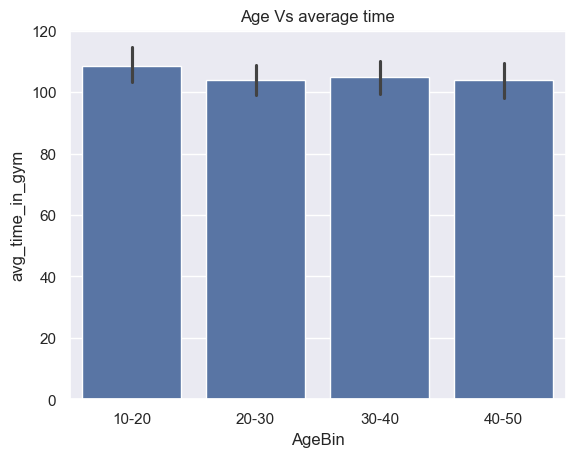

In [56]:
sns.barplot(x=df.AgeBin,y=df.avg_time_in_gym).set(title='Age Vs average time')
plt.show()

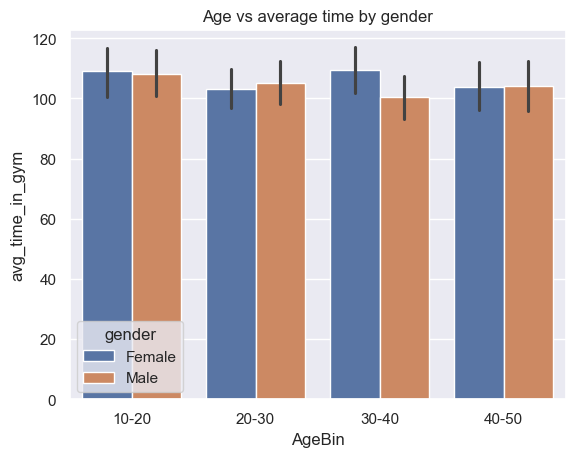

In [57]:
sns.barplot(x=df.AgeBin,y=df.avg_time_in_gym,hue=df.gender).set(title='Age vs average time by gender')
plt.show()

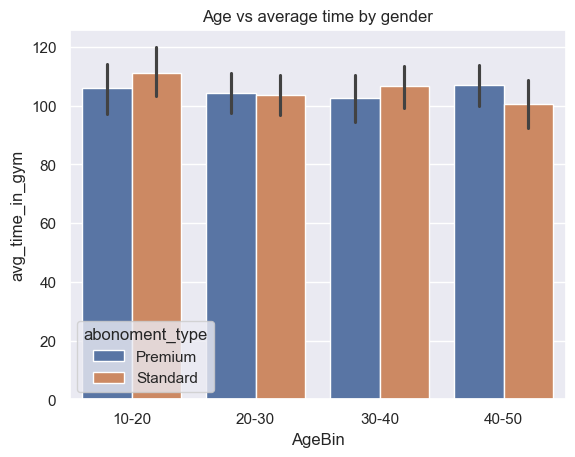

In [58]:
sns.barplot(x=df.AgeBin,y=df.avg_time_in_gym,hue=df.abonoment_type).set(title='Age vs average time by gender')
plt.show()

# Observation
- age group from 12-20 spend more time at the gym , with balance across the gender
- Females in the age  of 30-40 spend more time at the gym than male
  

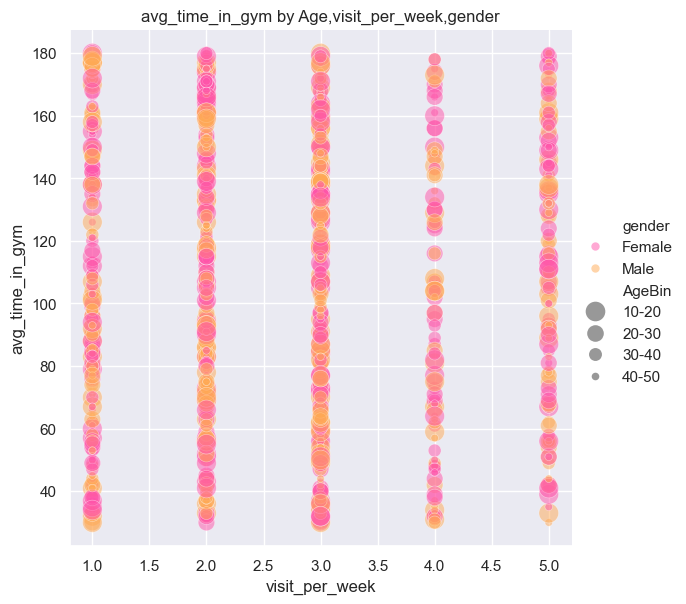

In [60]:
sns.relplot(x=df.visit_per_week, y=df.avg_time_in_gym, hue=df.gender, size= df.AgeBin,
            sizes=(30, 200), alpha=.5, palette="spring",
            height=6, data=df).set(title='avg_time_in_gym by Age,visit_per_week,gender');
plt.show()

# Observation
- Both females and males evenly distributed across numbers of days per week

<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Conclusion based on EDA
</div>


### Age & Gym Time
- Gym members’ ages range from 12 to 49 and Time spent at the gym varies widely with age-	Males tend to be older than females.
-	Males spend more time at ages 13–15 and around 23.
-	Females spend more time overall, peaking at age 32 with over 140 minutes the highest piont
### Gym Visit Frequency
-	Most members visit the gym 3 days a week.
-	Males and females are evenly spread across visit days.
### Personal Trainers
-	More members have personal trainers.
- More males have personal trainers than females.
### 	Gender & Subscription
-	More female members than male.
-	Females spend more time at the gym.
-	Standard subscription is more popular than premium.
-	More females subscribe to standard; more males to premium.
### 	Group Lessons & Drinks Subscription
-	Members not attending group lessons spend more time in the gym.
-	Slightly more males attend group lessons.
-	Members subscribing for drinks spend less time at the gym.
### 	Trainer Popularity
-	Mike is the most popular trainer, training equal numbers of males and females.
-	Hannah’s clients spend more time at the gym and are mostly female.
### 	Sauna Usage
-	Members using sauna spend more time at the gym.
-	More males use the sauna than females.
-	Sauna users mostly have premium subscriptions.
### 	Subscription Type & Visit Frequency
No significant difference in gym time by subscription type except at 4 visits per week, where standard subscribers outnumber premium.



<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Statistical testing
</div>


## Prove that Females members  spend more time at the gym than male members

### define null and alternate 
**Null Hypothesis (H₀):**
- There is no difference in average time spent at the gym between female and male members
  $H_0: \mu_female \leq \mu_male$
  
**Alternative Hypothesis (H₁):**
- Female memebers spend more time at the gym than male members
 $H_1: \mu_female > \mu_male$

**Identifying the type of test to use**
- One-tailed,Two sample t- test will be used because we are compearing two sample mean
- T stat test because Standard deviation of the population is not known and one-tailed test because of the direction of (female > male) alternate hypothesis indicate test is right tailed



In [61]:
# data for female only
Female = df[df['gender']=='Female']['avg_time_in_gym']

Female.count()

503

In [62]:
# data for male only
Male = df[df['gender']=='Male']['avg_time_in_gym']

Male.count()

497

In [63]:
print ("Average time spent at the gym by female is : {},\nAverage time spent at the gym by male is :{}"
       .format(Female.mean(),Male.mean()))

Average time spent at the gym by female is : 106.28628230616302,
Average time spent at the gym by male is :104.22132796780684


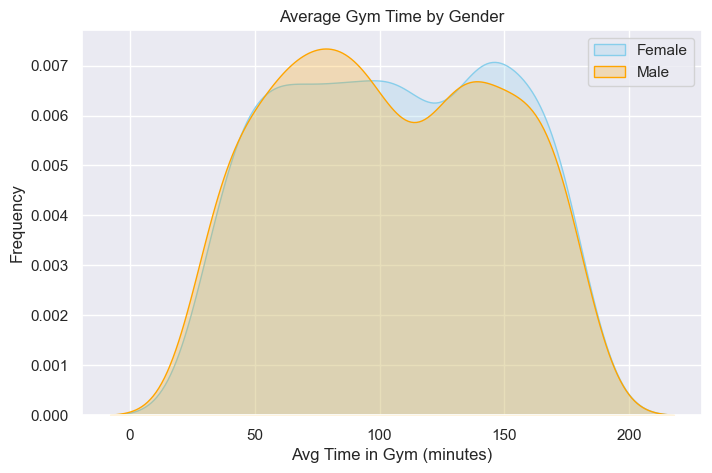

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.kdeplot(Female, 
            shade=True, color='skyblue', label='Female')

sns.kdeplot(Male, 
            shade=True, color='orange', label='Male')

plt.title("Average Gym Time by Gender")
plt.xlabel("Avg Time in Gym (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


- Female gym time distribution is slightly skewed toward higher durations.

- Male gym time has a more stable peak but doesn’t reach the same high durations as females.

In [65]:
t_stat,p_value = ttest_ind(Female,Male)
if t_stat > 0:
    Onetail_PV= p_value/2
else:
    Onetail_PV=1-(p_value/2)
print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_stat,p_value, Onetail_PV ))


Test statistic = 0.7494067632099342 , Pvalue =0.4537886799179186 , OnetailPvalue = 0.2268943399589593


In [66]:
Alpha = 0.05 
if Onetail_PV < Alpha:
    print("Since One tail test p value {} is less than Alpha {} ".format(p_value,Alpha))
    print("Reject the the null hypothesis stating Female members spend more time at the gym")
else:
    print("Fail to reject the null hypothesis because  p value {} greater than  Alpha {}".format(p_value,Alpha))
    print("Not enough evidence tha female spend more time at the gym")

Fail to reject the null hypothesis because  p value 0.4537886799179186 greater than  Alpha 0.05
Not enough evidence tha female spend more time at the gym


In [67]:
# cross check
print ("Average time spent at the gym by female is : {},\nAverage time spent at the gym by male is :{}"
       .format(Female.mean(),Male.mean()))

Average time spent at the gym by female is : 106.28628230616302,
Average time spent at the gym by male is :104.22132796780684


- The difference of average time visit at the gym based on gender has little diffence, not enough to conclude that female members spent more thime

 
<div style="background-color:#2a9d8f; color:white; padding:10px; font-size:24px; font-weight:bold; border-radius:5px;">
Recommendations
</div>


- Most members visit 3 days/week,offer a well tailored 3-day workout plans to match habits
- Males spend more time at ages 13–15 and 23,Offer youth focused classes and discounts around these ages,can help in attracting more younger male .
- Female gym time peaks at age 32 consideroffering age-specific programs for women in their 30s.
- Encourage more female signups by promoting trainers like Hannah, whose clients spend more time.
- Sauna users stay longer and prefer premium plans Promote the sauna as a premium feature to boost upgrades


